# Solutions of linear homogeneous ODEs

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE3093: Automatic control, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

### First order systems

$$
  \dot{x} + ax = 0
$$


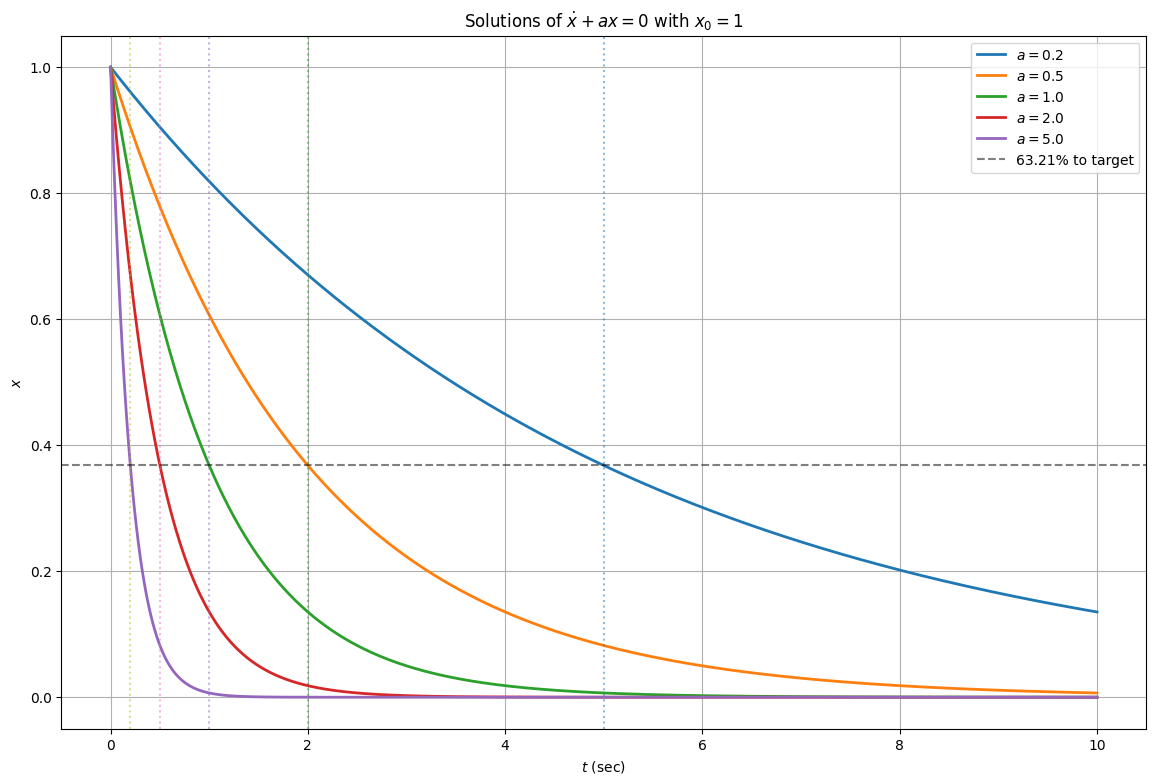

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

a_list = np.array([1/5, 1/2, 1, 2, 5])
K = len(a_list)
Y = []
for a in a_list:
  aa = -a
  bb = 0
  cc = 1
  dd = 0
  G = signal.StateSpace(aa,bb,cc,dd)
  t, yout, xout = signal.lsim(G, U=0, T=np.linspace(0,10,1000), X0=[1])
  Y.append(yout)

plt.figure(figsize=(14,9), dpi=100)
for k in range(K):
  plt.plot(t, Y[k], label=rf'$a={a_list[k]:3.1f}$', linewidth=2, color=plt.cm.tab20(0.1*k))
plt.axhline(np.exp(-1), linestyle='--', alpha=0.5, label='63.21% to target', color='k')
for k in range(K):
  plt.axvline(1/a_list[k], linestyle=':', alpha=0.5, color=plt.cm.tab20(k/K))
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x$')
plt.title(r'Solutions of $\dot{x} + ax = 0$ with $x_0=1$')
plt.legend()
plt.grid()
plt.show()


### Second order systems

$$
  \ddot{x} + 2\zeta\omega\dot{x} + \omega^2 x = 0
$$


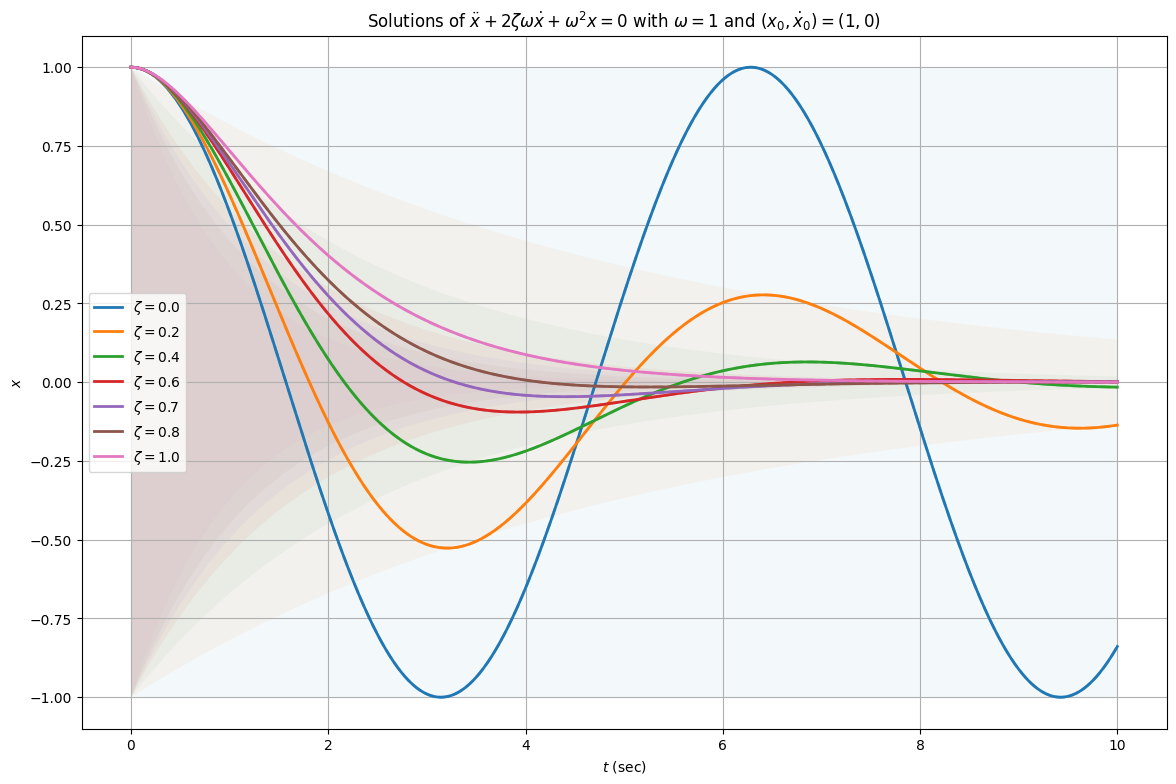

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

zeta_list = np.array([0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.99])

omega = 1
K = len(zeta_list)
Y = []
for zeta in zeta_list:
  aa = np.array([[0, 1],[-omega**2, -2*zeta*omega]])
  bb = np.array([[0], [omega**2]])
  cc = np.array([[1, 0]])
  dd = 0
  G = signal.StateSpace(aa,bb,cc,dd)
  t, yout, xout = signal.lsim(G, U=0, T=np.linspace(0,10,1000), X0=[1,0])
  Y.append(yout)

plt.figure(figsize=(14,9), dpi=100)
for k in range(K):
  zeta = zeta_list[k]
  plt.plot(t, Y[k], label=rf'$\zeta={zeta:3.1f}$', linewidth=2, color=plt.cm.tab20(0.1*k))
  plt.plot(t, np.exp(-zeta*omega*t)*np.cos(np.sqrt(1-zeta**2)*omega*t-np.arctan2(zeta,np.sqrt(1-zeta**2)))/np.sqrt(1-zeta**2), \
           linewidth=2, linestyle='--', alpha=0.5, color=plt.cm.tab20(0.1*k))
  UB =  np.exp(-zeta_list[k]*omega*t)
  plt.fill_between(t, -UB, UB, alpha=0.05)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x$')
plt.title(r'Solutions of $\ddot{x} + 2\zeta\omega\dot{x} + \omega^2 x = 0$ with $\omega=1$ and $(x_0, \dot{x}_0)=(1,0)$')
plt.legend()
plt.grid()
plt.show()

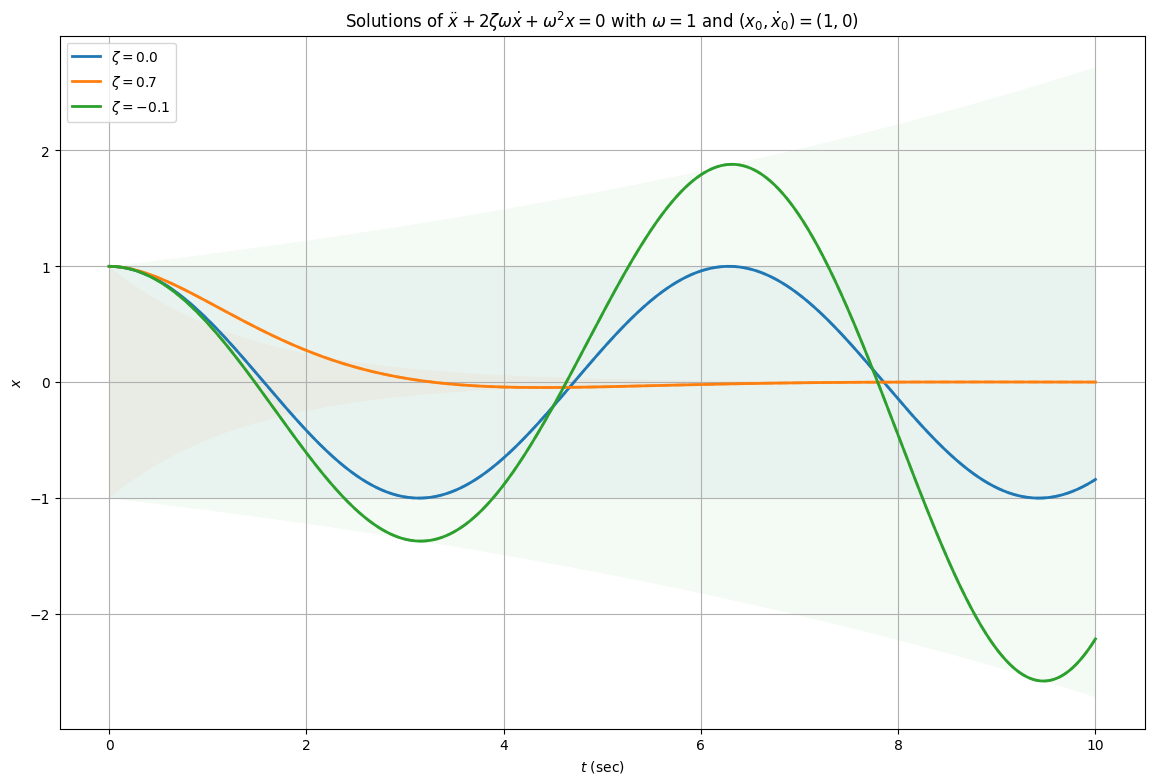

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

zeta_list = np.array([0, 0.7, -0.1])

omega = 1
K = len(zeta_list)
Y = []
for zeta in zeta_list:
  aa = np.array([[0, 1],[-omega**2, -2*zeta*omega]])
  bb = np.array([[0], [omega**2]])
  cc = np.array([[1, 0]])
  dd = 0
  G = signal.StateSpace(aa,bb,cc,dd)
  t, yout, xout = signal.lsim(G, U=0, T=np.linspace(0,10,1000), X0=[1,0])
  Y.append(yout)

plt.figure(figsize=(14,9), dpi=100)
for k in range(K):
  zeta = zeta_list[k]
  plt.plot(t, Y[k], label=rf'$\zeta={zeta:3.1f}$', linewidth=2, color=plt.cm.tab20(0.1*k))
  plt.plot(t, np.exp(-zeta*omega*t)*np.cos(np.sqrt(1-zeta**2)*omega*t-np.arctan2(zeta,np.sqrt(1-zeta**2)))/np.sqrt(1-zeta**2), \
           linewidth=2, linestyle='--', alpha=0.5, color=plt.cm.tab20(0.1*k))
  UB =  np.exp(-zeta_list[k]*omega*t)
  plt.fill_between(t, -UB, UB, alpha=0.05)
plt.xlabel(r'$t$ (sec)')
plt.ylabel(r'$x$')
plt.title(r'Solutions of $\ddot{x} + 2\zeta\omega\dot{x} + \omega^2 x = 0$ with $\omega=1$ and $(x_0, \dot{x}_0)=(1,0)$')
plt.legend()
# plt.xlim([0,4])
plt.grid()
plt.show()

In [ ]:
ㄹ